In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats

import utils
import seaborn as sns 
import seaborn.objects as so
import plotnine as pn
from sklearn.preprocessing import StandardScaler, scale


In [3]:
import importlib
importlib.reload(utils)


<module 'utils' from '/home/acercyc/Project/Keio Testing_analysis/src/utils.py'>

# One dot 

In [4]:
filename = utils.Save.savepath('ana_action_plan_dimentionality_redraw', 'one_dot_dim.csv')
df_all = pd.read_csv(filename)

df_all_group = df_all.copy()
df_all_group = df_all_group.drop(['trial no.', 'response'], axis=1)
df_all_group = df_all_group.groupby(['group', 'participant', 'actual control', 'angular bias'])
df_all_group = df_all_group.mean().reset_index()

df_all_group = df_all_group.rename(columns={'actual control': 'actual_control', 'angular bias': 'angular_bias'})


In [5]:
%load_ext rpy2.ipython

In [6]:
%R -i df_all_group
%R print(df_all_group)

    group participant actual_control angular_bias       dim
0       H  K-Reg-H-10           0.30            0 0.2387746
1       H  K-Reg-H-10           0.30           90 0.2657181
2       H  K-Reg-H-10           0.55            0 0.2203022
3       H  K-Reg-H-10           0.55           90 0.2906886
4       H  K-Reg-H-10           0.80            0 0.2299819
5       H  K-Reg-H-10           0.80           90 0.3637667
6       H  K-Reg-H-11           0.30            0 0.3032841
7       H  K-Reg-H-11           0.30           90 0.3192226
8       H  K-Reg-H-11           0.55            0 0.2579825
9       H  K-Reg-H-11           0.55           90 0.3051981
10      H  K-Reg-H-11           0.80            0 0.2455797
11      H  K-Reg-H-11           0.80           90 0.3261008
12      H  K-Reg-H-12           0.30            0 0.2351718
13      H  K-Reg-H-12           0.30           90 0.2495796
14      H  K-Reg-H-12           0.55            0 0.2470367
15      H  K-Reg-H-12           0.55    

,group,participant,actual_control,angular_bias,dim
0,H,K-Reg-H-10,0.30,0,0.238775
1,H,K-Reg-H-10,0.30,90,0.265718
2,H,K-Reg-H-10,0.55,0,0.220302
3,H,K-Reg-H-10,0.55,90,0.290689
4,H,K-Reg-H-10,0.80,0,0.229982
...,...,...,...,...,...
295,S,Reg-S-5,0.30,90,0.332415
296,S,Reg-S-5,0.55,0,0.258351
297,S,Reg-S-5,0.55,90,0.293828
298,S,Reg-S-5,0.80,0,0.231179


## Three-way anova

In [27]:
%%R
library(rstatix)
library(emmeans)
library(dplyr)
library(tidyr)
model <- anova_test(df_all_group, dv = dim, 
                    wid = participant,
                    within = c(actual_control, angular_bias),
                    between = group,
                    detailed = TRUE)

model
# anova_summary(model)
# emmeans_test(df_all_group, dim~actual_control)

# emmeans(model, ~ actual_control * angular_bias | group, adjust = "tukey")


R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following object is masked from ‘package:MASS’:

    select


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




ANOVA Table (type II tests)

$ANOVA
                             Effect DFn DFd       SSn   SSd        F        p
1                       (Intercept)   1  48 24.328000 0.605 1929.490 2.03e-40
2                             group   1  48  0.040000 0.605    3.162 8.20e-02
3                    actual_control   2  96  0.000989 0.062    0.762 4.70e-01
4                      angular_bias   1  48  0.003000 0.052    2.735 1.05e-01
5              group:actual_control   2  96  0.006000 0.062    4.469 1.40e-02
6                group:angular_bias   1  48  0.001000 0.052    1.057 3.09e-01
7       actual_control:angular_bias   2  96  0.000588 0.033    0.858 4.27e-01
8 group:actual_control:angular_bias   2  96  0.003000 0.033    4.890 1.00e-02
  p<.05      ges
1     * 0.970000
2       0.050000
3       0.001000
4       0.004000
5     * 0.008000
6       0.002000
7       0.000781
8     * 0.004000

$`Mauchly's Test for Sphericity`
                             Effect     W        p p<.05
1                 

## two way-simple anova

In [39]:
%%R
model <- anova_test(df_all_group %>% group_by(group), dv = dim, 
                    wid = participant,
                    within = c(actual_control, angular_bias),
                    detailed = TRUE)

print("---------------------------------- Health ----------------------------------")
print(model[[1, 2]])



[1] "---------------------------------- Health ----------------------------------"
[[1]]
ANOVA Table (type III tests)

$ANOVA
                       Effect DFn DFd    SSn   SSd        F        p p<.05
1                 (Intercept)   1  24 11.199 0.125 2143.267 5.51e-25     *
2              actual_control   2  48  0.005 0.033    3.903 2.70e-02     *
3                angular_bias   1  24  0.004 0.021    4.517 4.40e-02     *
4 actual_control:angular_bias   2  48  0.003 0.019    4.221 2.00e-02     *
    ges
1 0.983
2 0.026
3 0.019
4 0.017

$`Mauchly's Test for Sphericity`
                       Effect     W        p p<.05
1              actual_control 0.475 0.000191     *
2 actual_control:angular_bias 0.878 0.225000      

$`Sphericity Corrections`
                       Effect   GGe      DF[GG] p[GG] p[GG]<.05   HFe
1              actual_control 0.656 1.31, 31.47 0.047         * 0.678
2 actual_control:angular_bias 0.892  1.78, 42.8 0.025         * 0.958
       DF[HF] p[HF] p[HF]<.05
1 1.3

In [41]:
%%R
print("---------------------------------- Patient ---------------------------------")
print(model[[2, 2]])

[1] "---------------------------------- Patient ---------------------------------"
[[1]]
ANOVA Table (type III tests)

$ANOVA
                       Effect DFn DFd       SSn   SSd       F        p p<.05
1                 (Intercept)   1  24 13.169000 0.480 658.709 5.84e-19     *
2              actual_control   2  48  0.001000 0.030   1.206 3.08e-01      
3                angular_bias   1  24  0.000214 0.032   0.163 6.90e-01      
4 actual_control:angular_bias   2  48  0.000578 0.014   1.006 3.73e-01      
       ges
1 0.960000
2 0.003000
3 0.000386
4 0.001000

$`Mauchly's Test for Sphericity`
                       Effect     W     p p<.05
1              actual_control 0.677 0.011     *
2 actual_control:angular_bias 0.964 0.658      

$`Sphericity Corrections`
                       Effect   GGe      DF[GG] p[GG] p[GG]<.05   HFe
1              actual_control 0.756 1.51, 36.29 0.300           0.796
2 actual_control:angular_bias 0.966 1.93, 46.35 0.371           1.048
      DF[HF] p[HF] 

## simple main effect

In [11]:
%%R
library(ez)
library(multcomp)

# Run the three-way ANOVA using the ez package
myanova <- ezANOVA(
  data = df_all_group,
  dv = .(dim), # Replace "dependent_variable" with the name of your dependent variable
  wid = .(participant),
  within = .(actual_control, angular_bias), # Replace "within_subject_variable1" and "within_subject_variable2" with the names of your two within-subject variables
  between = .(group), # Replace "between_subject_variable" with the name of your between-subject variable
  type = 3, # Specify type 3 sum of squares to adjust for unbalanced designs
  detailed = TRUE,
  return_aov = TRUE
)

# Print the ANOVA table
print(myanova$ANOVA)

R[write to console]: Warning:
R[write to console]:  Converting "participant" to factor for ANOVA.

R[write to console]: Warning:
R[write to console]:  "actual_control" will be treated as numeric.

R[write to console]: Warning:
R[write to console]:  "angular_bias" will be treated as numeric.

R[write to console]: Warning:
R[write to console]:  Converting "group" to factor for ANOVA.

R[write to console]: Warning:
R[write to console]:  There is at least one numeric within variable, therefore aov() will be used for computation and no assumption checks will be obtained.



                             Effect DFn DFd     F     p p<.05      ges
1                             group   1  48 3.162 0.082       0.052000
2                    actual_control   1  48 0.140 0.710       0.000198
3                      angular_bias   1  48 2.735 0.105       0.004000
4              group:actual_control   1  48 4.223 0.045     * 0.006000
5                group:angular_bias   1  48 1.057 0.309       0.002000
6       actual_control:angular_bias   1  48 1.330 0.255       0.000755
7 group:actual_control:angular_bias   1  48 7.982 0.007     * 0.005000


In [25]:
%%R
# print(glht(myanova$aov))
myanova$aov
emmeans_test(myanova$aov, ~ actual_control * angular_bias | group, adjust = "tukey")

R[write to console]: Error in get_formula_left_hand_side(formula) : 
  argument "formula" is missing, with no default




Error in get_formula_left_hand_side(formula) : 
  argument "formula" is missing, with no default


RInterpreterError: Failed to parse and evaluate line '# print(glht(myanova$aov))\nmyanova$aov\nemmeans_test(myanova$aov)\n'.
R error message: 'Error in get_formula_left_hand_side(formula) : \n  argument "formula" is missing, with no default'

## Simple two-ways anova

In [12]:
%%R

myanova <- ezANOVA(
  data = subset(df_all_group, group == "H"),
  dv = .(dim), # Replace "dependent_variable" with the name of your dependent variable
  wid = .(participant),
  within = .(actual_control, angular_bias), # Replace "within_subject_variable1" and "within_subject_variable2" with the names of your two within-subject variables
  type = 3, # Specify type 3 sum of squares to adjust for unbalanced designs
  detailed = TRUE
)
print("Two-way on Health----------------------------------------------------------------------------")
print(myanova$ANOVA)


myanova <- ezANOVA(
  data = subset(df_all_group, group == "S"),
  dv = .(dim), # Replace "dependent_variable" with the name of your dependent variable
  wid = .(participant),
  within = .(actual_control, angular_bias), # Replace "within_subject_variable1" and "within_subject_variable2" with the names of your two within-subject variables
  type = 3, # Specify type 3 sum of squares to adjust for unbalanced designs
  detailed = TRUE
)
print("Two-way on patients")
print(myanova$ANOVA)

R[write to console]: Warning:
R[write to console]:  Converting "participant" to factor for ANOVA.

R[write to console]: Warning:
R[write to console]:  "actual_control" will be treated as numeric.

R[write to console]: Warning:
R[write to console]:  "angular_bias" will be treated as numeric.

R[write to console]: Warning:
R[write to console]:  There is at least one numeric within variable, therefore aov() will be used for computation and no assumption checks will be obtained.



[1] "Two-way on Health----------------------------------------------------------------------------"
                       Effect DFn DFd         SSn        SSd        F
1              actual_control   1  24 0.003035947 0.02695906 2.702718
2                angular_bias   1  24 0.003928926 0.02087598 4.516877
3 actual_control:angular_bias   1  24 0.003267152 0.01278404 6.133557
           p p<.05        ges
1 0.11321487       0.04769375
2 0.04405254     * 0.06086828
3 0.02070297     * 0.05114016


R[write to console]: Warning:
R[write to console]:  Converting "participant" to factor for ANOVA.

R[write to console]: Warning:
R[write to console]:  "actual_control" will be treated as numeric.

R[write to console]: Warning:
R[write to console]:  "angular_bias" will be treated as numeric.

R[write to console]: Warning:
R[write to console]:  There is at least one numeric within variable, therefore aov() will be used for computation and no assumption checks will be obtained.



[1] "Two-way on patients"
                       Effect DFn DFd          SSn         SSd         F
1              actual_control   1  24 0.0014527042 0.022421497 1.5549765
2                angular_bias   1  24 0.0002140043 0.031565092 0.1627147
3 actual_control:angular_bias   1  24 0.0005770557 0.007030781 1.9698149
          p p<.05         ges
1 0.2244350       0.023254402
2 0.6902407       0.003495010
3 0.1732745       0.009368636


In [40]:
df_anova = df_all_group.pivot(index=['participant'], values='dim', columns=[ 'group', 'actual_control', 'angular_bias'])
df_anova = df_anova.reset_index()
# df_anova.to_csv('df_anova.csv', index=False)

In [43]:
df_anova.reset_index()

group          index participant         H                                \
actual_control                         0.3                0.55             
angular_bias                             0        90         0        90   
0                  0  K-Reg-H-10  0.238775  0.265718  0.220302  0.290689   
1                  1  K-Reg-H-11  0.303284  0.319223  0.257983  0.305198   
2                  2  K-Reg-H-12  0.235172  0.249580  0.247037  0.246597   
3                  3  K-Reg-H-13  0.279153  0.275151  0.237848  0.228834   
4                  4  K-Reg-H-14  0.274146  0.247334  0.260832  0.278688   
5                  5  K-Reg-H-15  0.331573  0.285716  0.264766  0.307477   
6                  6  K-Reg-H-16  0.397730  0.381775  0.296234  0.326342   
7                  7  K-Reg-H-17  0.243780  0.270303  0.209100  0.221610   
8                  8  K-Reg-H-18  0.279704  0.290750  0.303140  0.294107   
9                  9  K-Reg-H-19  0.275848  0.305057  0.257863  0.265781   
10                10  K-Reg-H-20  0.270145  0.272647  0.246289  0.274815   
11                11  K-Reg-H-21  0.225380  0.219408  0.212806  0.229131   
12                12  K-Reg-H-22  0.302935  0.297238  0.299268  0.272905   
13                13  K-Reg-H-23  0.331823  0.306001  0.244069  0.273392   
14                14  K-Reg-H-24  0.266577  0.276809  0.257198  0.275247   
15                15  K-Reg-H-25  0.212451  0.246069  0.240084  0.238133   
16                16  K-Reg-H-26  0.251717  0.245119  0.216654  0.246080   
17                17  K-Reg-H-27  0.224199  0.242394  0.231352  0.230896   
18                18   K-Reg-H-3  0.312109  0.284318  0.355823  0.303070   
19                19   K-Reg-H-4  0.291394  0.290787  0.301751  0.306876   
20                20   K-Reg-H-5  0.287181  0.297360  0.256154  0.285852   
21                21   K-Reg-H-6  0.273747  0.299986  0.296600  0.303508   
22                22   K-Reg-H-7  0.324063  0.293053  0.309390  0.281417   
23                23   K-Reg-H-8  0.310666  0.266289  0.241115  0.272683   
24                24   K-Reg-H-9  0.322796  0.280334  0.274213  0.290498   
25                25   K-Reg-S-1       NaN       NaN       NaN       NaN   
26                26  K-Reg-S-10       NaN       NaN       NaN       NaN   
27                27  K-Reg-S-11       NaN       NaN       NaN       NaN   
28                28  K-Reg-S-12       NaN       NaN       NaN       NaN   
29                29  K-Reg-S-13       NaN       NaN       NaN       NaN   
30                30  K-Reg-S-14       NaN       NaN       NaN       NaN   
31                31  K-Reg-S-15       NaN       NaN       NaN       NaN   
32                32  K-Reg-S-16       NaN       NaN       NaN       NaN   
33                33  K-Reg-S-17       NaN       NaN       NaN       NaN   
34                34  K-Reg-S-18       NaN       NaN       NaN       NaN   
35                35  K-Reg-S-19       NaN       NaN       NaN       NaN   
36                36   K-Reg-S-2       NaN       NaN       NaN       NaN   
37                37  K-Reg-S-20       NaN       NaN       NaN       NaN   
38                38  K-Reg-S-21       NaN       NaN       NaN       NaN   
39                39   K-Reg-S-3       NaN       NaN       NaN       NaN   
40                40   K-Reg-S-4       NaN       NaN       NaN       NaN   
41                41   K-Reg-S-6       NaN       NaN       NaN       NaN   
42                42   K-Reg-S-7       NaN       NaN       NaN       NaN   
43                43   K-Reg-S-8       NaN       NaN       NaN       NaN   
44                44   K-Reg-S-9       NaN       NaN       NaN       NaN   
45                45     Reg-S-1       NaN       NaN       NaN       NaN   
46                46     Reg-S-2       NaN       NaN       NaN       NaN   
47                47     Reg-S-3       NaN       NaN       NaN       NaN   
48                48     Reg-S-4       NaN       NaN       NaN       NaN   
49                49     Reg-S-5       NaN      

In [19]:
import pingouin as pg
df_all_group_ = df_all_group.query('group == "H"')
# pg.pairwise_tests(df_all_group_, dv='dim', between='group', within=['actual_control', 'angular_bias'], effsize='cohen', subject='participant')
pg.pairwise_tests(df_all_group_, dv='dim', between='group', within=['angular_bias', 'actual_control'], effsize='cohen', subject='participant')

/home/acercyc/anaconda3/envs/py310/lib/python3.10/site-packages/pingouin/pairwise.py:478: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
/home/acercyc/anaconda3/envs/py310/lib/python3.10/site-packages/pingouin/pairwise.py:382: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
/home/acercyc/anaconda3/envs/py310/lib/python3.10/site-packages/pingouin/pairwise.py:383: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are

,Contrast,angular_bias,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,cohen
0,angular_bias,-,0.0,90.0,True,True,-2.125295,24.0,two-sided,0.044053,1.416,-0.321149
1,actual_control,-,0.3,0.55,True,True,2.724157,24.0,two-sided,0.011832,4.151,0.419408
2,actual_control,-,0.3,0.8,True,True,1.643994,24.0,two-sided,0.113215,0.685,0.318100
3,actual_control,-,0.55,0.8,True,True,-0.820356,24.0,two-sided,0.420087,0.286,-0.085331
4,angular_bias * actual_control,0,0.3,0.55,True,True,2.913967,24.0,two-sided,0.007606,6.021,0.540431
5,angular_bias * actual_control,0,0.3,0.8,True,True,2.398057,24.0,two-sided,0.024614,2.265,0.521532
6,angular_bias * actual_control,0,0.55,0.8,True,True,0.265870,24.0,two-sided,0.792610,0.218,0.032846
7,angular_bias * actual_control,90,0.3,0.55,True,True,1.341812,24.0,two-sided,0.192215,0.468,0.207144
8,angular_bias * actual_control,90,0.3,0.8,True,True,-0.061527,24.0,two-sided,0.951449,0.211,-0.011842
9,angular_bias * actual_control,90,0.55,0.8,True,True,-1.312312,24.0,two-sided,0.201828,0.453,-0.201871


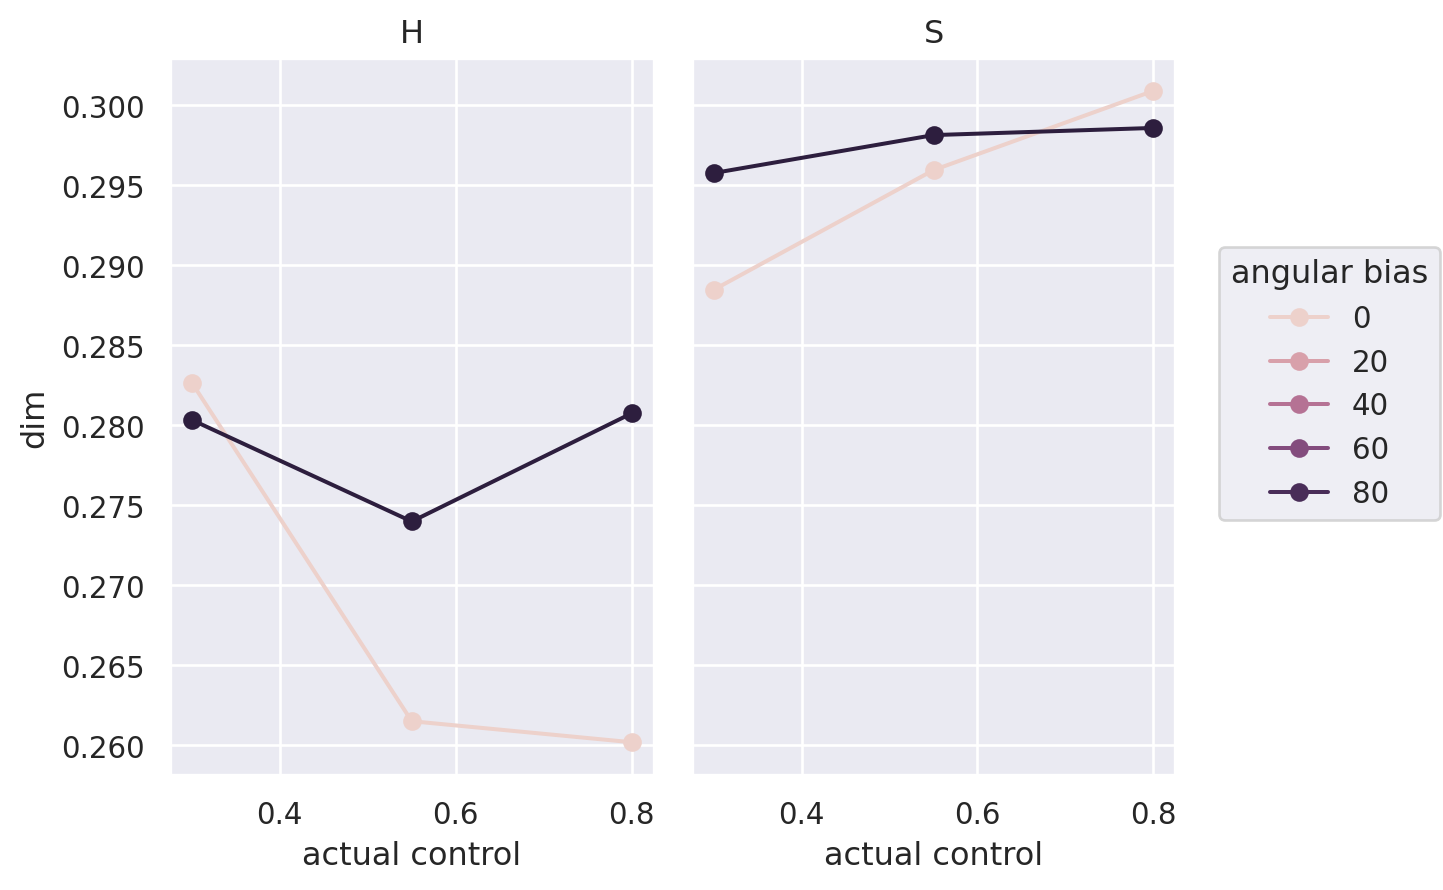

In [16]:
(
    so.Plot(df_all_group, x="actual control", y="dim", color="angular bias")
    .facet("group")
    .add(so.Line(marker="o"), so.Agg())
)

In [19]:
df_all.head()

,participant,trial no.,target dot,actual control,angular bias,selected dot,accuracy,group,dim
0,K-Reg-H-10,1,2,0.30,0,1,incorrect,H,0.410813
1,K-Reg-H-10,2,2,0.55,0,1,incorrect,H,0.320908
2,K-Reg-H-10,3,3,0.30,90,1,incorrect,H,0.489129
3,K-Reg-H-10,4,3,0.55,0,3,correct,H,0.385105
4,K-Reg-H-10,5,3,0.30,90,3,correct,H,0.359738


In [20]:
filename = utils.Save.savepath('ana_action_plan_dimentionality_redraw', 'three_dot_dim.csv')
df_all = pd.read_csv(filename)

df_all_group = df_all.copy()
df_all_group = df_all_group.drop(['trial no.','target dot','selected dot', 'accuracy'], axis=1)
df_all_group = df_all_group.groupby(['group', 'participant', 'actual control', 'angular bias'])
df_all_group = df_all_group.mean().reset_index()


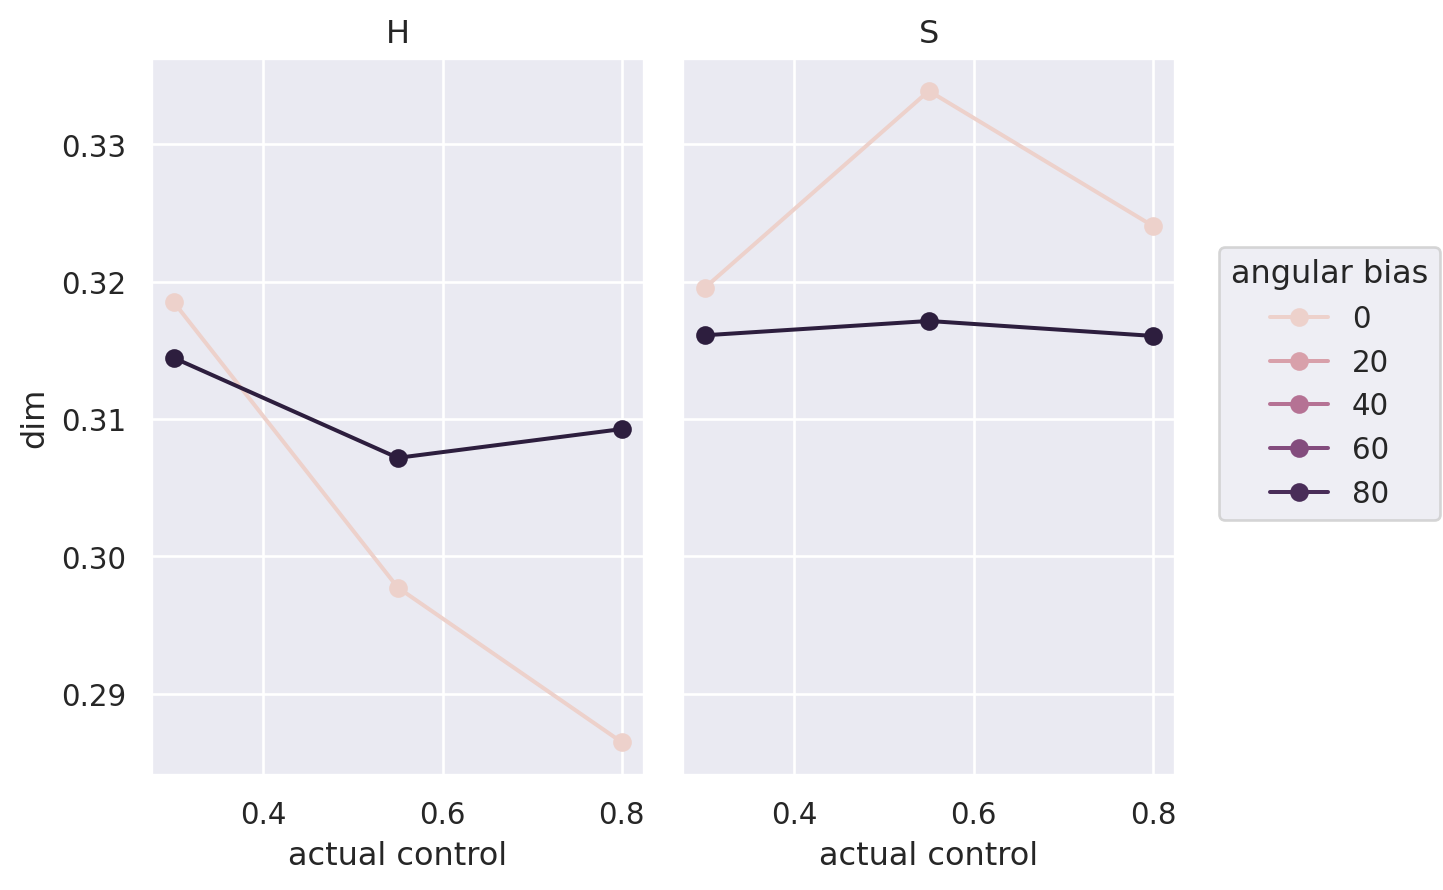

In [21]:
(
    so.Plot(df_all_group, x="actual control", y="dim", color="angular bias")
    .facet("group")
    .add(so.Line(marker="o"), so.Agg())
)

# Measuring dimensionality 

In [8]:
subjs = utils.ExpInfo.getSubjIDs()
task = utils.ExpInfo.taskName[0]

# compute dimensionality 
def add_dim(subj, task):
    df = utils.LoadData.behaviorData(subj, task)
    x, h, y = utils.LoadData.xhy(subj, task)
    dims = []
    for h_ in h:
        h_ = scale(h_, axis=0)
        dims.append(utils.Analysis.dim_measure(h_))
    df_ = df
    df_['dim'] = dims
    return df_
    
df_all = utils.GroupOperation.map(add_dim, subjs, task)
df_all = pd.concat(df_all, axis=0)


Group loop |████████████████████████████████████████| 50/50 [100%] in 6.5s (7.61/s)                                     


In [9]:
filename = utils.Save.savepath('ana_action_plan_dimentionality_redraw', 'one_dot_dim.csv')
df_all.to_csv(filename, index=False)

In [2]:
filename = utils.Save.savepath('ana_action_plan_dimentionality_redraw', 'one_dot_dim.csv')
df_all = pd.read_csv(filename)

df_all_group = df_all.copy()
df_all_group = df_all_group.drop(['trial no.', 'response'], axis=1)
df_all_group = df_all_group.groupby(['group', 'participant', 'actual control', 'angular bias'])
df_all_group = df_all_group.mean().reset_index()


NameError: name 'utils' is not defined

In [7]:
df_all_.head()

,participant,trial no.,actual control,angular bias,response,dim
0,K-Reg-H-10,1,0.30,0,0,0.264689
1,K-Reg-H-10,2,0.80,0,1,0.195716
2,K-Reg-H-10,3,0.30,0,0,0.239894
3,K-Reg-H-10,4,0.55,90,0,0.237551
4,K-Reg-H-10,5,0.30,90,0,0.249905


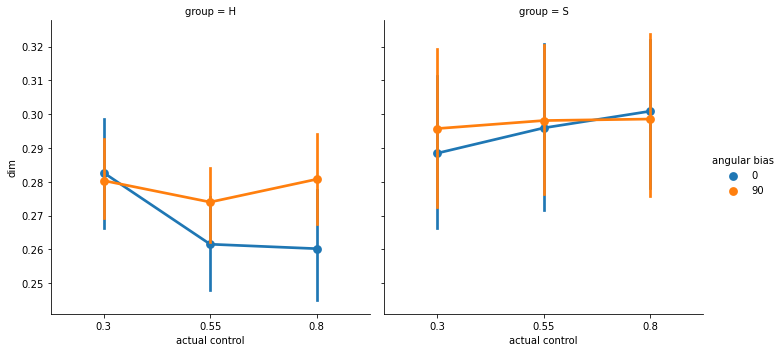

In [105]:
df_all_group = df_all_.copy()
df_all_group = df_all_group.drop(['trial no.', 'response'], axis=1)
df_all_group = df_all_group.groupby(['group', 'participant', 'actual control', 'angular bias'])
df_all_group = df_all_group.mean().reset_index()
# df_all_group = df_all_group.groupby()
# df_all_group.
sns.catplot(x='actual control', y='dim', hue='angular bias', data=df_all_group, col='group', kind='point')
# sns.catplot(x='actual control', y='nSeg', hue='angular bias', data=df_nap_, kind='point', col='group')

In [78]:
df_all_group = df_all_.copy()
df_all_group = df_all_group.drop(['trial no.', 'response'], axis=1)
df_all_group = df_all_group.groupby(['group', 'participant', 'actual control', 'angular bias'])
df_all_group = df_all_group.agg(['mean', 'std']).reset_index()
df_all_group.columns = df_all_group.columns.to_flat_index()
df_all_group.columns = [''.join(c) for c in df_all_group.columns]
df_all_group
# df_all_group = df_all_group.groupby()
# df_all_group.
# sns.catplot(x='actual control', y='dim', hue='angular bias', data=df_all_group, col='group', kind='point')
# sns.catplot(x='actual control', y='nSeg', hue='angular bias', data=df_nap_, kind='point', col='group')

,group,participant,actual control,angular bias,dimmean,dimstd
0,H,K-Reg-H-10,0.30,0,0.238775,0.038806
1,H,K-Reg-H-10,0.30,90,0.265718,0.039986
2,H,K-Reg-H-10,0.55,0,0.220302,0.017047
3,H,K-Reg-H-10,0.55,90,0.290689,0.048756
4,H,K-Reg-H-10,0.80,0,0.229982,0.029701
...,...,...,...,...,...,...
295,S,Reg-S-5,0.30,90,0.332415,0.084333
296,S,Reg-S-5,0.55,0,0.258351,0.039677
297,S,Reg-S-5,0.55,90,0.293828,0.072613
298,S,Reg-S-5,0.80,0,0.231179,0.019622


In [ ]:
# df_all_group.groupby()

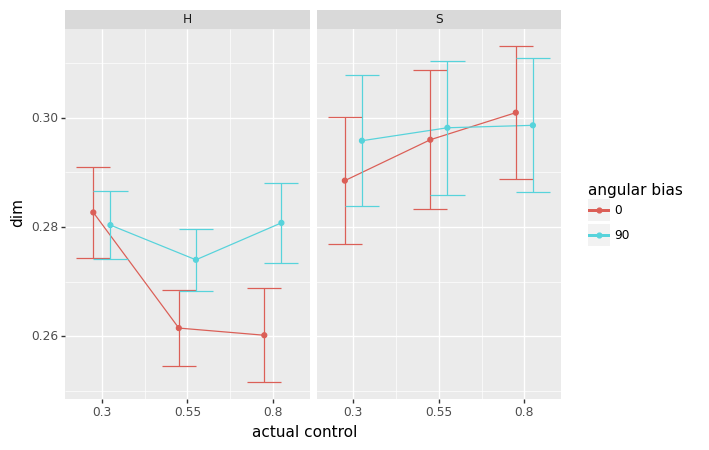

<ggplot: (8763998817241)>

In [131]:
import plotnine as pn
import plotnine_prism as pnp
from scipy.stats import sem
df_all_group_ = df_all_group.copy()
df_all_group_['angular bias'] = pd.Categorical(df_all_group_['angular bias'])
# df_all_group_['actual control'] = pd.Categorical(df_all_group_['actual control'])
(pn.ggplot(df_all_group_, pn.aes(x='actual control', y='dim', color='angular bias')) + 
 pn.stat_summary(geom='point', fun_y=np.mean, position=pn.position_dodge(width=0.1)) +
 pn.stat_summary(geom='line', fun_y=np.mean, position=pn.position_dodge(width=0.1)) +
 pn.stat_summary(geom='errorbar', fun_data = 'mean_se', width = 0.2, position=pn.position_dodge(width=0.1)) +
#  pn.geom_line() + 
#  pn.geom_point() + 
#  pn.theme_gray() +
 pn.scale_x_continuous(breaks=[0.3, 0.55, 0.8], labels=['0.3', '0.55', '0.8'])+
 pn.facet_wrap('group') 
)

In [6]:
df_all_group.head()

,group,participant,actual control,angular bias,dim
0,H,K-Reg-H-10,0.30,0,0.238775
1,H,K-Reg-H-10,0.30,90,0.265718
2,H,K-Reg-H-10,0.55,0,0.220302
3,H,K-Reg-H-10,0.55,90,0.290689
4,H,K-Reg-H-10,0.80,0,0.229982


# Statistical testing

In [28]:
df_all_group_ = df_all_group.copy()
df_anova = df_all_group_.pivot_table(index='participant', values='dim', columns=['group', 'actual control', 'angular bias'])
df_anova = df_anova.reset_index()
df_anova.to_csv('anova')

In [21]:
from pingouin import mixed_anova
anova = mixed_anova(df_all_group, dv='dim', within=['group', 'actual control', 'angular bias'],
                    between='group')

ValueError: within and between factors must both be strings referring to a column in the data. Specifying multiple within and between factors is currently not supported. For more information, see: https://github.com/raphaelvallat/pingouin/issues/136

In [18]:
from statsmodels.stats.anova import AnovaRM
df_all_group_ = df_all_group.rename(columns={'actual control': 'actual_control', 
                                             'angular bias': 'angular_bias'})
anova = AnovaRM(df_all_group_, 'dim', 'participant', 
                within=['actual_control', "angular_bias"], 
                between='group').fit()


NotImplementedError: Between subject effect not yet supported!

In [17]:
print(anova)

                          Anova
                            F Value Num DF  Den DF Pr > F
---------------------------------------------------------
actual_control               0.7116 2.0000 98.0000 0.4934
angular_bias                 2.7322 1.0000 49.0000 0.1047
actual_control:angular_bias  0.7950 2.0000 98.0000 0.4545



## logistic regression on dimensionality and response

In [ ]:
def reg_dim_resp(subj, task):
    df_dim = add_dim(subj, task)
    df_dim = sm.add_constant(df_dim)
    logit_res = sm.Logit(df_dim['response'], df_dim[['dim', 'const']]).fit()
    return logit_res

logit_res = utils.GroupOperation.map(reg_dim_resp, subjs, task)

In [133]:
# extract coefficients and compute group t-test
dim_beta = [x.params['dim'] for x in logit_res]
scipy.stats.ttest_1samp(dim_beta, 0)

Ttest_1sampResult(statistic=-2.376005879805179, pvalue=0.02582898625194411)